In [31]:
# -------------------- load raw data -------------------

label=[]
raw_image=[]

for line in open('./Homework/train.csv'):
#     line = f.readline()
    line = line.split(',')
#     print(line)
    if not(line[0].isdigit()):
        continue
    label.append(line[0])
    raw_image.append(line[1].split())    

    

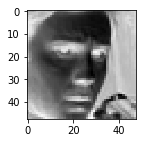

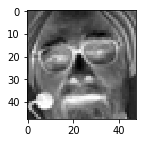

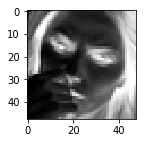

(22000, 48, 48)


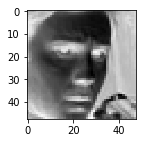

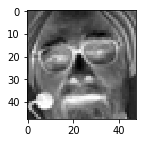

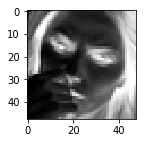

In [13]:
# --------------------- format data ----------------------
import numpy as np
temp = np.array(raw_image).reshape(len(raw_image),48,48).astype(np.int)
for i in range(3):
    plot_image(temp[i])  # print raw image

np.save("trainX", temp)

temp = np.load("trainX.npy")
print(temp.shape)

for i in range(3):
    plot_image(temp[i])  # print reloaded image

temp = np.array(label).reshape(len(label),1).astype(np.int)
print(temp[:10])


np.save("trainY", temp)

temp = np.load("trainY.npy")
print(temp.shape)
print(temp[:10])

# 0: mad, 1:disgust, 2: terrified, 3: happy, 4: sad, 5: suprised, 6: netural

In [16]:
# ---------------- loading format data -----------------

import numpy as np
from keras.utils import np_utils  


trainX = np.load("datasets/trainX_split1.npy")
print(type(trainX[0]), trainX.shape)
trainX = trainX/255
print(trainX[0])

trainY = np.load("datasets/trainY_split1.npy")
print(type(trainY[0]), trainY.shape)
print(trainY[:5])

trainX = trainX.reshape(trainX.shape[0], 48, 48, 1).astype('float32') 

trainY_oneHot = np_utils.to_categorical(trainY)  
print(trainY_oneHot.shape)

def get_class_weights(y):
    uni_val, counter = np.unique(y, return_counts=True)
    print(uni_val)
    print(counter)

    return  [float(10000/count) for count in counter]

class_weights=get_class_weights(trainY)
print(class_weights)

<class 'numpy.ndarray'> (17600, 48, 48)
[[0.02352941 0.02745098 0.02745098 ... 0.0627451  0.05490196 0.05098039]
 [0.01960784 0.02745098 0.02745098 ... 0.08627451 0.05490196 0.03529412]
 [0.02352941 0.01568627 0.05490196 ... 0.12941176 0.03137255 0.04705882]
 ...
 [0.         0.16470588 0.50196078 ... 0.03137255 0.02745098 0.02352941]
 [0.44313725 0.79215686 0.90196078 ... 0.03137255 0.02745098 0.02352941]
 [0.89019608 0.90196078 0.89411765 ... 0.04313725 0.02745098 0.02352941]]
<class 'numpy.ndarray'> (17600, 1)
[[1]
 [6]
 [5]
 [4]
 [2]]
(17600, 7)
[0 1 2 3 4 5 6]
[2450  284 2550 4423 2954 1901 3038]
[4.081632653061225, 35.2112676056338, 3.9215686274509802, 2.2609088853719195, 3.3852403520649967, 5.260389268805891, 3.291639236339697]


In [2]:
# ------------------------shuffle dataset--------------------------

import numpy as np
def union_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]


trainX, trainY = union_shuffled_copies(trainX, trainY)
print(trainY[:5])
trainY_oneHot = np_utils.to_categorical(trainY)  

NameError: name 'trainX' is not defined

In [22]:
# -----------------------stratified sampling --------------------------

from sklearn.model_selection import StratifiedShuffleSplit
X = np.array([[10, 2], [30, 4], [10, 20], [3, 40], [30, 40], [1, 20], [300, 4], [3, 400], [100, 2], [300, 40], 
              [31, 4], [11, 2], [3, 41], [31, 41], [1, 21], [311, 4], [3, 411], [11, 21], [311, 41], [31, 411]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

def stratified_sampling(data, label, valid_percent=0.2):
    spliter = StratifiedShuffleSplit(n_splits=int(1/valid_percent), test_size=valid_percent, train_size=1-valid_percent, random_state=0)
    train_index_set, valid_index_set = [], []
    for train_index, valid_index in spliter.split(data, label):
        print("TRAIN:", train_index, len(train_index), "TEST:", valid_index, len(valid_index))
        train_index_set.append(train_index)
        valid_index_set.append(valid_index)
    return train_index_set, valid_index_set

t_ind, v_ind = stratified_sampling(trainX, trainY, valid_percent=0.2)

counter=0
for tt, vv in zip(t_ind, v_ind):
    counter+=1
    np.save("trainX_split{}".format(counter), trainX[tt])
    np.save("validX_split{}".format(counter), trainX[vv])
    np.save("trainY_split{}".format(counter), trainY[tt])
    np.save("validY_split{}".format(counter), trainY[vv])
    

TRAIN: [ 5667  3986 20006 ... 19371  9666 19362] 17600 TEST: [ 3391 10811  7669 ...  7051  4723  7756] 4400
TRAIN: [ 4707  2570  1397 ... 15023  2004 21316] 17600 TEST: [ 3549 18532  4237 ... 20005  6186  9844] 4400
TRAIN: [12111 21798  7860 ...  2119  9278  1968] 17600 TEST: [19264  1555 15213 ...  7141 18977 14496] 4400
TRAIN: [20830 16239 15366 ... 12882 19215 21811] 17600 TEST: [18250 10376 20387 ...  4351  8704  3816] 4400
TRAIN: [16788 21019  1074 ...  6093  8681  4932] 17600 TEST: [ 8851  7844  4403 ... 10306 10978  2373] 4400


[[0.50196078 0.49803922 0.49803922 ... 0.43529412 0.29411765 0.22745098]
 [0.50196078 0.50196078 0.49411765 ... 0.41176471 0.29019608 0.21960784]
 [0.47843137 0.48627451 0.48627451 ... 0.41960784 0.29019608 0.2       ]
 ...
 [0.01960784 0.03529412 0.03921569 ... 0.11372549 0.14901961 0.2       ]
 [0.03137255 0.05882353 0.05490196 ... 0.11372549 0.14117647 0.18823529]
 [0.04313725 0.0745098  0.08235294 ... 0.10980392 0.1254902  0.17254902]]
<class 'numpy.ndarray'> (17600, 48, 48)
(17600, 48, 48) [[0.5019608  0.49803922 0.49803922 ... 0.43529412 0.29411766 0.22745098]
 [0.5019608  0.5019608  0.49411765 ... 0.4117647  0.2901961  0.21960784]
 [0.47843137 0.4862745  0.4862745  ... 0.41960785 0.2901961  0.2       ]
 ...
 [0.01960784 0.03529412 0.03921569 ... 0.11372549 0.14901961 0.2       ]
 [0.03137255 0.05882353 0.05490196 ... 0.11372549 0.14117648 0.1882353 ]
 [0.04313726 0.07450981 0.08235294 ... 0.10980392 0.1254902  0.17254902]]
(17600, 1) [[2]
 [3]
 [3]
 [6]
 [4]]
(17600, 7)


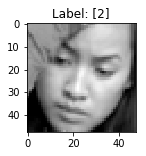

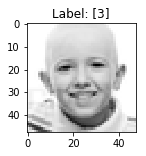

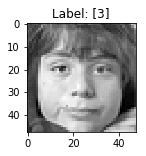

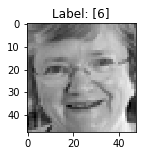

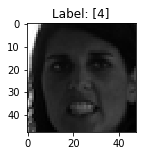

In [87]:
# ------------------------ image data augmentation --------------------------
trainX = np.load("datasets/trainX_split4.npy")
print(trainX[0])
print(type(trainX[0]), trainX.shape)

trainX = trainX.reshape(trainX.shape[0], 48, 48, 1).astype('float32') 


from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# datagen = ImageDataGenerator(fill_mode='constant', rotation_range=20)
# datagen = ImageDataGenerator(fill_mode='constant', shear_range=20)
# datagen = ImageDataGenerator(fill_mode='constant', zoom_range=0.3)
datagen = ImageDataGenerator(fill_mode='constant', horizontal_flip=True)
datagen.fit(trainX)
counter=0
trainX_aug = []
trainY_aug = []
generate_amount=len(trainX)

for bx, by in datagen.flow(trainX, trainY, batch_size=1, shuffle=False):
    counter+=1
    if counter>generate_amount: break

    bx=np.squeeze(bx, axis=3)
#     bx=np.squeeze(bx, axis=0)
    trainX_aug.append(bx)
    trainY_aug.append(by)

trainX_aug = np.concatenate(trainX_aug, axis=0).reshape(generate_amount, 48, 48)
print(trainX_aug.shape, trainX_aug[0])
# for t in temp:
#     plot_image(t)
trainY_aug = np.vstack(trainY_aug)
print(trainY_aug.shape, trainY_aug[:5])

np.save("datasets/trainX_split_flip4", trainX_aug)

trainY_oneHot_aug = np_utils.to_categorical(trainY_aug)      
print(trainY_oneHot_aug.shape)
for i in range(5):
    plot_image(trainX_aug[i].reshape(48, 48), trainY_aug[i])


[[4]
 [3]
 [6]
 [3]
 [0]]
(17600, 48, 48) [[0.50196078 0.49803922 0.49803922 ... 0.43529412 0.29411765 0.22745098]
 [0.50196078 0.50196078 0.49411765 ... 0.41176471 0.29019608 0.21960784]
 [0.47843137 0.48627451 0.48627451 ... 0.41960784 0.29019608 0.2       ]
 ...
 [0.01960784 0.03529412 0.03921569 ... 0.11372549 0.14901961 0.2       ]
 [0.03137255 0.05882353 0.05490196 ... 0.11372549 0.14117647 0.18823529]
 [0.04313725 0.0745098  0.08235294 ... 0.10980392 0.1254902  0.17254902]]


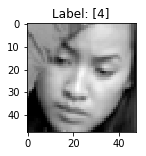

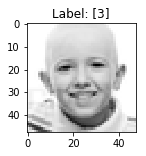

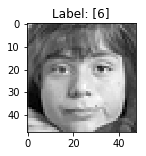

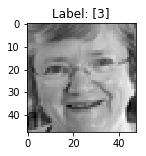

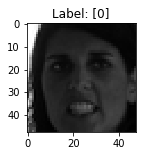

(17600, 48, 48) [[0.5019608  0.49803922 0.49803922 ... 0.43529412 0.29411766 0.22745098]
 [0.5019608  0.5019608  0.49411765 ... 0.4117647  0.2901961  0.21960784]
 [0.47843137 0.4862745  0.4862745  ... 0.41960785 0.2901961  0.2       ]
 ...
 [0.01960784 0.03529412 0.03921569 ... 0.11372549 0.14901961 0.2       ]
 [0.03137255 0.05882353 0.05490196 ... 0.11372549 0.14117648 0.1882353 ]
 [0.04313726 0.07450981 0.08235294 ... 0.10980392 0.1254902  0.17254902]]


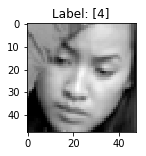

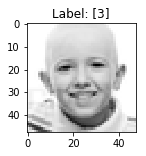

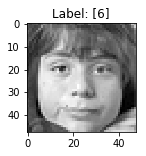

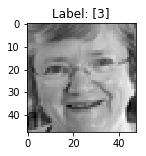

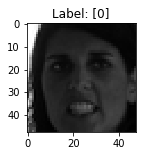

In [89]:
trainY = np.load("datasets/trainY_split4.npy")
print(trainY[:5])
trainY_oneHot = np_utils.to_categorical(trainY)  

trainX=np.load("datasets/trainX_split4.npy")
print(trainX.shape, trainX[0])
for i in range(5):
    plot_image(trainX[i].reshape(48, 48), trainY[i])


# trainY_oneHot_aug = np_utils.to_categorical(trainY_aug)      
# print(trainY_oneHot_aug.shape)
trainX_aug=np.load("datasets/trainX_split_flip4.npy")
print(trainX_aug.shape, trainX_aug[0])
for i in range(5):
    plot_image(trainX_aug[i].reshape(48, 48), trainY[i])
    
trainX_aug = trainX_aug.reshape(trainX_aug.shape[0], 48, 48, 1).astype('float32')     
trainX = trainX.reshape(trainX.shape[0], 48, 48, 1).astype('float32')     

In [11]:
# ------------------------ plotting function --------------------------

%matplotlib inline

import os  
import matplotlib.pyplot as plt  

def plot_image(image, label=""):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)
    plt.title("Label: {}".format(label))
    plt.imshow(image, cmap='gray')  
    plt.show()  
    
    


KeyboardInterrupt: 

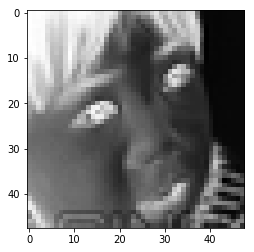

In [11]:
# ------------------------save array to image--------------------------

for ind in range(len(trainX)):
    plt.imshow(trainX[ind], cmap='binary')  
    plt.savefig("./images/sample_{}".format(str(ind)))

In [81]:
from keras.models import Sequential  
from keras.layers import Dense, Dropout, Flatten, Activation 
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization  
from keras import regularizers
    
model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=8,  
                 kernel_size=(3,3),  
                 padding='same',  
                 input_shape=(48, 48, 1),
#                  kernel_initializer='he_normal', bias_initializer='zeros', 
#                  kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  

model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=8,  
                 kernel_size=(3,3),  
                 padding='same',
#                 kernel_initializer='he_normal', bias_initializer='zeros', 
#                 kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  

model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
# Add Dropout layer 1 
model.add(Dropout(0.25))

  
# Create CN layer 2  
model.add(Conv2D(filters=16,  
                kernel_size=(3,3),  
                padding='same',
#                 kernel_initializer='he_normal', bias_initializer='zeros', 
#                 kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  

model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=16,  
                kernel_size=(3,3),  
                padding='same',
#                 kernel_initializer='he_normal', bias_initializer='zeros', 
#                 kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  

model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))  
# Add Dropout layer 2 
model.add(Dropout(0.25))

# Create CN layer 3 
model.add(Conv2D(filters=32,  
                kernel_size=(3,3),  
                padding='same',
#                 kernel_initializer='he_normal', bias_initializer='zeros', 
#                 kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  

model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=32,  
                kernel_size=(3,3),  
                padding='same',
#                 kernel_initializer='he_normal', bias_initializer='zeros', 
#                 kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  

model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
# Create Max-Pool 3  
model.add(MaxPooling2D(pool_size=(2,2)))  
# Add Dropout layer 3
model.add(Dropout(0.25))

'''
model.add(Conv2D(filters=64,  
                kernel_size=(3,3),  
                padding='same',
                kernel_initializer='he_uniform', bias_initializer='zeros', 
                kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  

model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=64,  
                kernel_size=(3,3),  
                padding='same',
                kernel_initializer='he_uniform', bias_initializer='zeros', 
                kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  

model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1)) 
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Dropout(0.25))
'''

model.add(Flatten())  

model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.5))  

model.add(Dense(7, activation='softmax'))  

model.summary()  
print("")  



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 48, 48, 8)         80        
_________________________________________________________________
activation_45 (Activation)   (None, 48, 48, 8)         0         
_________________________________________________________________
batch_normalization_45 (Batc (None, 48, 48, 8)         32        
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 48, 48, 8)         584       
_________________________________________________________________
activation_46 (Activation)   (None, 48, 48, 8)         0         
_________________________________________________________________
batch_normalization_46 (Batc (None, 48, 48, 8)         32        
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 24, 24, 8)         0         
__________

In [58]:
# ------------------------ model training --------------------------

from keras import optimizers

# adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=10e-8, decay=0.0, amsgrad=False)
# 定義訓練方式  
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

# 開始訓練  
train_history = model.fit(x=trainX, y=trainY_oneHot, validation_split=0.2, class_weight=class_weights,
                          epochs=50, batch_size=100, verbose=2)  

Train on 14080 samples, validate on 3520 samples
Epoch 1/50
 - 135s - loss: 1.9633 - acc: 0.2330 - val_loss: 1.7724 - val_acc: 0.2750
Epoch 2/50
 - 129s - loss: 1.8029 - acc: 0.2612 - val_loss: 1.7262 - val_acc: 0.3119
Epoch 3/50
 - 131s - loss: 1.7640 - acc: 0.2800 - val_loss: 1.6760 - val_acc: 0.3261
Epoch 4/50
 - 130s - loss: 1.7262 - acc: 0.3039 - val_loss: 1.6672 - val_acc: 0.3443
Epoch 5/50
 - 129s - loss: 1.6846 - acc: 0.3251 - val_loss: 1.6785 - val_acc: 0.3378
Epoch 6/50
 - 128s - loss: 1.6471 - acc: 0.3448 - val_loss: 1.5659 - val_acc: 0.3810
Epoch 7/50
 - 129s - loss: 1.6196 - acc: 0.3599 - val_loss: 1.5156 - val_acc: 0.4017
Epoch 8/50
 - 129s - loss: 1.5905 - acc: 0.3685 - val_loss: 1.4840 - val_acc: 0.4236
Epoch 9/50
 - 128s - loss: 1.5619 - acc: 0.3872 - val_loss: 1.4970 - val_acc: 0.4128
Epoch 10/50
 - 127s - loss: 1.5395 - acc: 0.3965 - val_loss: 1.4378 - val_acc: 0.4369
Epoch 11/50
 - 131s - loss: 1.5213 - acc: 0.3995 - val_loss: 1.4042 - val_acc: 0.4477
Epoch 12/50
 -

KeyboardInterrupt: 

In [79]:
# ------------------------ augmentation testing--------------------------

from keras import optimizers


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
# trainX_aug = trainX_aug.reshape(trainX_aug.shape[0], 48, 48, 1).astype('float32') 
# print(trainX.shape, trainX_aug.shape)
tempX = np.vstack((trainX, trainX_aug))
tempY_oneHot = np.vstack((trainY_oneHot, trainY_oneHot))
print(tempX.shape, tempY_oneHot.shape)
train_history = model.fit(x=tempX, y=tempY_oneHot, validation_split=0.2, class_weight=class_weights,
                          epochs=50, batch_size=100, verbose=2)



(35200, 48, 48, 1) (35200, 7)
Train on 28160 samples, validate on 7040 samples
Epoch 1/50
 - 255s - loss: 1.9117 - acc: 0.2419 - val_loss: 1.7627 - val_acc: 0.2618
Epoch 2/50
 - 249s - loss: 1.7749 - acc: 0.2657 - val_loss: 1.6938 - val_acc: 0.3200
Epoch 3/50
 - 259s - loss: 1.7126 - acc: 0.3062 - val_loss: 1.6431 - val_acc: 0.3501
Epoch 4/50
 - 277s - loss: 1.6483 - acc: 0.3426 - val_loss: 1.5755 - val_acc: 0.3844
Epoch 5/50
 - 264s - loss: 1.5996 - acc: 0.3686 - val_loss: 1.5212 - val_acc: 0.4080
Epoch 6/50
 - 264s - loss: 1.5550 - acc: 0.3915 - val_loss: 1.5029 - val_acc: 0.4091
Epoch 7/50
 - 254s - loss: 1.5190 - acc: 0.4060 - val_loss: 1.4705 - val_acc: 0.4287
Epoch 8/50
 - 256s - loss: 1.4875 - acc: 0.4172 - val_loss: 1.4073 - val_acc: 0.4560
Epoch 9/50
 - 275s - loss: 1.4563 - acc: 0.4393 - val_loss: 1.3862 - val_acc: 0.4629
Epoch 10/50
 - 279s - loss: 1.4361 - acc: 0.4435 - val_loss: 1.3764 - val_acc: 0.4685
Epoch 11/50
 - 269s - loss: 1.4042 - acc: 0.4582 - val_loss: 1.3482 - 

In [80]:
validX= np.load("datasets/validX_split5.npy")
validX = validX.reshape(validX.shape[0], 48, 48, 1).astype('float32')     
print(type(trainX[0]), trainX.shape)
print(type(validX[0]), validX.shape)
# trainX = trainX/255
# print(trainX[0])

validY = np.load("datasets/validY_split5.npy")
validY = np_utils.to_categorical(validY)  
print(type(trainY[0]), trainY.shape)
print(type(validY[0]), validY.shape)
loss, accuracy = model.evaluate(x=validX, y=validY, batch_size=100, verbose=1)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

<class 'numpy.ndarray'> (17600, 48, 48, 1)
<class 'numpy.ndarray'> (4400, 48, 48, 1)
<class 'numpy.ndarray'> (17600, 1)
<class 'numpy.ndarray'> (4400, 7)
4400/4400 [==============================] - 9s 2ms/step

Loss: 1.17, Accuracy: 55.91%


In [71]:
import h5py
from keras.models import load_model, save_model
model.save('models/09120853_dataAugShear_model5.h5')

# model1 = load_model('models/09071448_model.h5')

In [14]:

train_history = model1.fit(x=trainX, y=trainY_oneHot, validation_split=0.2, class_weight=class_weights,
                          epochs=20, batch_size=100, verbose=2)  

Train on 17600 samples, validate on 4400 samples
Epoch 1/20
 - 176s - loss: 1.0253 - acc: 0.6079 - val_loss: 1.1136 - val_acc: 0.5866
Epoch 2/20
 - 178s - loss: 1.0205 - acc: 0.6164 - val_loss: 1.1226 - val_acc: 0.5898
Epoch 3/20
 - 165s - loss: 1.0284 - acc: 0.6144 - val_loss: 1.1479 - val_acc: 0.5702
Epoch 4/20
 - 172s - loss: 1.0241 - acc: 0.6103 - val_loss: 1.1362 - val_acc: 0.5720
Epoch 5/20
 - 157s - loss: 1.0105 - acc: 0.6172 - val_loss: 1.1396 - val_acc: 0.5791
Epoch 6/20
 - 158s - loss: 1.0216 - acc: 0.6115 - val_loss: 1.1181 - val_acc: 0.5923
Epoch 7/20
 - 160s - loss: 1.0193 - acc: 0.6165 - val_loss: 1.1303 - val_acc: 0.5827
Epoch 8/20
 - 155s - loss: 1.0074 - acc: 0.6166 - val_loss: 1.1182 - val_acc: 0.5852
Epoch 9/20


KeyboardInterrupt: 